<a href="https://colab.research.google.com/github/shivampip/NotDog/blob/master/mayank_dogclassfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/shivampip/NotDog.git

Cloning into 'NotDog'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 6766 (delta 23), reused 2 (delta 0), pack-reused 6702
Receiving objects: 100% (6766/6766), 164.70 MiB | 45.82 MiB/s, done.
Resolving deltas: 100% (67/67), done.


In [2]:
cd NotDog/

/content/NotDog


In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
from loadImage import LoadImages

# Load Dataset

In [0]:
ABC=LoadImages("data/notdog")
BCD=LoadImages("data/dog")
notdog=ABC.ImageToNumpyArray(150,150,3)
dog=BCD.ImageToNumpyArray(150,150,3)


In [0]:
ydog=np.ones((dog.shape[0],1))
ynotdog=np.zeros((notdog.shape[0],1))

In [0]:
x_dataset=np.concatenate([dog,notdog],axis=0)
y_dataset=np.concatenate([ydog,ynotdog],axis=0)

# Normalizing 

In [0]:
x_dataset =x_dataset/255.0

# Split Dataset

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x_dataset,y_dataset,shuffle=True)

# Model Building
    

In [0]:
from tensorflow.keras import layers
from tensorflow.keras import Model
import tensorflow as tf

In [10]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))


x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)


x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)


x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
__________

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [14]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Train on 4875 samples, validate on 1625 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
4875/4875 [==============================] - 9s 2ms/sample - loss: 0.7326 - acc: 0.6377 - val_loss: 0.5451 - val_acc: 0.7237
Epoch 2/10
4875/4875 [==============================] - 5s 1ms/sample - loss: 0.5683 - acc: 0.7102 - val_loss: 0.5384 - val_acc: 0.7231
Epoch 3/10
4875/4875 [==============================] - 5s 986us/sample - loss: 0.5170 - acc: 0.7415 - val_loss: 0.7314 - val_acc: 0.6812
Epoch 4/10
4875/4875 [==============================] - 5s 994us/sample - loss: 0.4548 - acc: 0.7832 - val_loss: 0.5052 - val_acc: 0.7582
Epoch 5/10
4875/4875 [==============================] - 5s 1ms/sample - loss: 0.4057 - acc: 0.8139 - val_loss: 0.5748 - val_acc: 0.7538
Epoch 6/10
4875/4875 [==============================] - 5s 1ms/sample - loss: 0.3319 - acc: 0.8527 - val_loss: 0.5140 - val_acc: 0.7637
Epoch 7/10
4875/4875 [==============================] - 5s 1ms/sample - loss: 0.2542

# Prediction

In [0]:
ABC=LoadImages("data/external")
test_dataset=ABC.ImageToNumpyArray(150,150,3)

In [0]:
classes= {1: "Dog", 0:"NotDog"}
pred_y=model.predict(test_dataset)

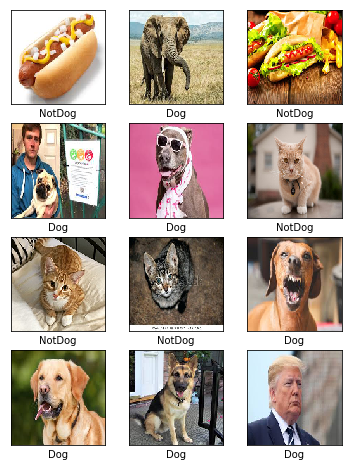

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 8))
for i in range(1, test_dataset.shape[0]+1):
    plt.subplot(4, 3, i)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(classes[int(pred_y[i-1])])
    plt.imshow(np.array(test_dataset[i-1], dtype=np.int32))
plt.show()